<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import warnings
import plotly.express as px
import requests
import plotly.io as pio
import numpy as np
from bs4 import BeautifulSoup

In [2]:
# Use only one of the following lines:

# Display interactive graphs
# pio.renderers.default = 'plotly_mimetype+notebook'

# Display image of graphs for correct displaying on GitHub 
pio.renderers.default = 'png'

# Ignore pandas warnings when querying DB
warnings.filterwarnings('ignore')

In [3]:
# Set your DB сonnection options here
DBNAME = 'xxxxxxxxxxxx'
USER = 'xxxxxxxxxxxx'
PASSWORD = 'xxxxxxxxxxxx'
HOST = 'xxxxxxxxxxxx'
PORT = 'xxxxxxxxxxxx'

In [4]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
query_3_1 = f'''
    SELECT
        COUNT(id) total_vacancies
    FROM
        public.vacancies
'''

In [6]:
total_vacancies = pd.read_sql_query(query_3_1, connection)
print('Всего вакансий в базе:', total_vacancies.iloc[0, 0])

Всего вакансий в базе: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [7]:
query_3_2 = f'''
    SELECT
        COUNT(id) total_employers
    FROM
        public.employers
'''

In [8]:
total_employers = pd.read_sql_query(query_3_2, connection)
print('Всего работодателей в базе:', total_employers.iloc[0, 0])

Всего работодателей в базе: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
query_3_3 = f'''
    SELECT
        COUNT(id) total_areas
    FROM
        public.areas
'''

In [10]:
total_areas = pd.read_sql_query(query_3_3, connection)
print('Всего регионов в базе:', total_areas.iloc[0, 0])

Всего регионов в базе: 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
query_3_4 = f'''
    SELECT
        COUNT(id) total_industries
    FROM
        public.industries
'''

In [12]:
total_industries = pd.read_sql_query(query_3_4, connection)
print('Всего сфер деятельности в базе:', total_industries.iloc[0, 0])

Всего сфер деятельности в базе: 294


***

Количество вакансий примерно в 2 раза больше, чем количество работодателей, что свидетельствует о том, что многие работодатели публикуют более одной вакансии.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
query_4_1 = f'''
    SELECT
        a.name area,
        COUNT(a.name) cnt
    FROM
        public.areas a
        JOIN public.vacancies v ON a.id = v.area_id
    GROUP BY a.name 
    ORDER BY COUNT(a.name) DESC
'''

In [14]:
areas_count = pd.read_sql_query(query_4_1, connection)
print('Количество вакансий в каждом регионе в порядке убывания')
display(areas_count)

Количество вакансий в каждом регионе в порядке убывания


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
query_4_2 = f'''
    SELECT
        COUNT(id)
    FROM
        public.vacancies
    WHERE
        salary_from IS NOT NULL
        OR salary_to IS NOT NULL
'''

In [16]:
not_null_salary = pd.read_sql_query(query_4_2, connection)
print('Количество вакансий, у которых хотя бы одно из полей зарплаты заполнено:', not_null_salary.iloc[0, 0])

Количество вакансий, у которых хотя бы одно из полей зарплаты заполнено: 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
query_4_3 = f'''
    SELECT
        AVG(salary_from) low,
        AVG(salary_to) high
    FROM
        public.vacancies
'''

In [18]:
avg_salary = pd.read_sql_query(query_4_3, connection)
print(
    'Среднее значение нижней границы зарплатной вилки: ', round(avg_salary.iloc[0, 0]), '\n',
    'Среднее значение верхней границы зарплатной вилки: ', round(avg_salary.iloc[0, 1]), '\n',
    sep='', end=''
)

Среднее значение нижней границы зарплатной вилки: 71065
Среднее значение верхней границы зарплатной вилки: 110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
query_4_4 = f'''
    SELECT
        schedule,
        employment,
        COUNT(schedule) cnt
    FROM
        public.vacancies
    GROUP BY schedule, employment
    ORDER BY COUNT(schedule) DESC
'''

In [20]:
schedule_employment = pd.read_sql_query(query_4_4, connection)
print('Количество вакансий для всех пар "график-трудоустройство"')
display(schedule_employment)

Количество вакансий для всех пар "график-трудоустройство"


,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
query_4_5 = f'''
    SELECT
        experience,
        COUNT(experience) cnt
    FROM
        public.vacancies
    GROUP BY experience
    ORDER BY COUNT(experience)
'''

In [22]:
exp_rate = pd.read_sql_query(query_4_5, connection)
print('Количество вакансий для различных групп опыта работы')
display(exp_rate)

Количество вакансий для различных групп опыта работы


,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

* Примерно в половине вакансий оба поля с зарплатой пустые. Если нам будет необходимо прогнозировать ЗП, то половина данных сразу же отсеивается, что может ухудшить точность прогнозируемой ЗП.
* Средняя зарплата варьируется в диапазоне от 71 065 руб. до 110 537 руб.
* Топ-2 самых непопулярных пар *график - занятость*:
    1. Сменный график - Проектная работа
    2. Вахтовый метод - Проектная работа

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
n = 5
query_5_1 = f'''
    SELECT
        e.name,
        COUNT(e.name) cnt
    FROM
        public.vacancies v
        JOIN public.employers e ON e.id = v.employer_id
    GROUP BY e.name
    ORDER BY COUNT(e.name) DESC
    LIMIT {n}
'''

In [24]:
top_five_employers = pd.read_sql_query(query_5_1, connection)
print('Топ-5 работодателей по количеству вакансий')
display(top_five_employers)

Топ-5 работодателей по количеству вакансий


,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
query_5_2 = f'''
    SELECT
        a.name,
        COUNT(v.id) vacancies,
        COUNT(e.id) employers
    FROM
        public.areas a
        LEFT JOIN public.employers e ON e.area = a.id
        LEFT JOIN public.vacancies v ON v.area_id = a.id
    WHERE v.id IS NULL
    GROUP BY a.name
    ORDER BY employers DESC
'''

In [26]:
areas_without_vacancies = pd.read_sql_query(query_5_2, connection)
print('Регионы без вакансий, отсортированные по количеству работодателей в них')
display(areas_without_vacancies)

Регионы без вакансий, отсортированные по количеству работодателей в них


,name,vacancies,employers
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
query_5_3 = f'''
    SELECT
        e.name,
        COUNT(DISTINCT v.area_id) cnt
    FROM
        public.employers e
        JOIN public.vacancies v ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY cnt DESC 
'''

In [28]:
employer_areas_count = pd.read_sql_query(query_5_3, connection)
print('Количество регионов, в которых работодатели публикуют свои вакансии')
display(employer_areas_count)

Количество регионов, в которых работодатели публикуют свои вакансии


,name,cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
query_5_4 = f'''
    SELECT
        COUNT(*)
    FROM
        public.employers e
        LEFT JOIN public.employers_industries ei ON ei.employer_id = e.id
        LEFT JOIN public.industries i ON ei.industry_id = i.id
    WHERE i.name IS NULL
'''

In [30]:
employer_null_industries = pd.read_sql_query(query_5_4, connection)
print('Количество работодателей, у которых не указана сфера деятельности:', employer_null_industries.iloc[0, 0])

Количество работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [31]:
n = 3
query_5_5 = f'''
    SELECT
        e.name,
        COUNT(i.id) cnt
    FROM
        public.employers e
        LEFT JOIN public.employers_industries ei ON ei.employer_id = e.id
        LEFT JOIN public.industries i ON ei.industry_id = i.id
    WHERE i.name IS NOT NULL
    GROUP BY e.name
    HAVING COUNT(i.id) = 4
    ORDER BY name
    LIMIT {n}
'''

In [32]:
employer_four_industries = pd.read_sql_query(query_5_5, connection)
print('Первые 3 компании(в алфавитном порядке), у которых указано 4 сферы деятельности')
display(employer_four_industries)

Первые 3 компании(в алфавитном порядке), у которых указано 4 сферы деятельности


,name,cnt
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [33]:
query_5_6 = f'''
    SELECT
        COUNT(*)
    FROM
        public.employers e
        JOIN public.employers_industries ei ON e.id = ei.employer_id
        JOIN public.industries i ON i.id = ei.industry_id
    WHERE i.name = 'Разработка программного обеспечения'
'''

In [34]:
employers_devs = pd.read_sql_query(query_5_6, connection)
print('Количество компаний, занимающихся разработкой ПО:', employers_devs.iloc[0, 0])

Количество компаний, занимающихся разработкой ПО: 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
cities = []
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')

# Find a first table on page with class 'standard sortable' to get table with necessary cities
table = page.find('table', class_='standard sortable')

# Iterate table rows
for row in table.find_all('tr'):
    # Add all unpacked text from tag 'a' to list
    cities.append(row.find('a').text)

# Make a tuple from list to add in SQL query
# 1-st element is column name which we don't need
cities = tuple(cities[1:])

In [36]:
employer_vacancy_area = '''
    public.employers e
    LEFT JOIN public.vacancies v ON e.id = v.employer_id
    LEFT JOIN public.areas a ON a.id = v.area_id
'''
yandex_filter = f'''
    e.name = 'Яндекс' AND a.name IN {cities}
'''
query_5_7 = f'''
    SELECT
        a.name,
        COUNT(a.name) cnt
    FROM
        {employer_vacancy_area}
    WHERE {yandex_filter}
    GROUP BY a.name
    
    UNION ALL
    
    SELECT
        'total', count(*)
    FROM
        {employer_vacancy_area}
    WHERE {yandex_filter}
    
    ORDER BY cnt
'''

In [37]:
yandex_top = pd.read_sql_query(query_5_7, connection)
print('Количество вакансий компании "Яндекс" в городах-миллионниках')
display(yandex_top)

Количество вакансий компании "Яндекс" в городах-миллионниках


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

* Топ-1 работодатель по количеству вакансий и разнообразию регионов - Яндекс
* 36% работодателей не указывают сферы деятельности.
* 15% работодателей занимаются разработкой ПО.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [38]:
query_6_1 = f'''
    SELECT
        COUNT(id)
    FROM
        public.vacancies
    WHERE
        lower(name) LIKE '%data%'
        OR lower(name) LIKE '%данн%'
'''

In [39]:
data_vacancies = pd.read_sql_query(query_6_1, connection)
print('Количество вакансий, имеющих отношение к данным:', data_vacancies.iloc[0, 0])

Количество вакансий, имеющих отношение к данным: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [40]:
ds_filter = '''
    (lower(v.name) LIKE '%data scientist%'
    OR lower(v.name) LIKE '%data science%'
    OR lower(v.name) LIKE '%исследователь данных%'
    OR (v.name LIKE '%ML%' and lower(v.name) NOT LIKE '%html%')
    OR lower(v.name) LIKE '%machine learning%'
    OR lower(v.name) LIKE '%машинн%обучен%')
'''
query_6_2 = f'''
    SELECT
        COUNT(v.id)
    FROM
        public.vacancies v
    WHERE
        {ds_filter}
        AND
        (lower(v.name) LIKE '%junior%'
        OR lower(v.experience) LIKE '%нет опыта%'
        OR lower(v.employment) LIKE '%стажировка%')
'''

In [41]:
ds_vacancies_junior = pd.read_sql_query(query_6_2, connection)
print('Количество подходящих вакансий для начинающего дата-сайентиста:', ds_vacancies_junior.iloc[0, 0])

Количество подходящих вакансий для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
query_6_3 = f'''
    SELECT
        COUNT(v.id)
    FROM
        public.vacancies v
    WHERE
        {ds_filter}
        AND
        (v.key_skills LIKE '%SQL%'
        OR lower(v.key_skills) LIKE '%postgres%')
'''

In [43]:
ds_sql = pd.read_sql_query(query_6_3, connection)
print('Количество вакансий, в которых ключевым навыком является SQL или postgres:', ds_sql.iloc[0, 0])

Количество вакансий, в которых ключевым навыком является SQL или postgres: 201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [44]:
query_6_4 = f'''
    SELECT
        COUNT(v.id)
    FROM
        public.vacancies v
    WHERE
        {ds_filter}
        AND
        lower(v.key_skills) LIKE '%python%'
'''

In [45]:
ds_python = pd.read_sql_query(query_6_4, connection)
print('Количество вакансий, в которых ключевым навыком является Python:', ds_python.iloc[0, 0])

Количество вакансий, в которых ключевым навыком является Python: 351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [46]:
query_6_5 = f'''
    SELECT
        v.key_skills
    FROM
        public.vacancies v
    WHERE {ds_filter}
'''

In [47]:
ds_skills = pd.read_sql_query(query_6_5, connection)
not_null_mask = ds_skills['key_skills'].notnull()
skills_len = ds_skills[not_null_mask]['key_skills'].apply(lambda x: len(str(x).split('\t')))
skills_mean = round(skills_len.mean(), 2)
print(f'В среднем в вакансиях для DS указывают {skills_mean} ключевых навыков')

В среднем в вакансиях для DS указывают 6.41 ключевых навыков


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [48]:
query_6_6 = f'''
    WITH exp_salary AS (
        SELECT
            v.experience,
            COALESCE(v.salary_to, 0) + COALESCE(v.salary_from, 0) salary
        FROM
            public.vacancies v
        WHERE
            {ds_filter}
            AND(
                (v.salary_from IS NOT NULL AND v.salary_to IS NULL)
                OR (v.salary_from IS NULL AND v.salary_to IS NOT NULL)
            )
        
        UNION ALL
    
        SELECT
            v.experience,
            (v.salary_to + v.salary_from) / 2
        FROM
            public.vacancies v
        WHERE
            {ds_filter}
            AND(v.salary_from IS NOT NULL
                AND v.salary_to IS NOT NULL)
    )
    SELECT
        es.experience,
        AVG(es.salary) average_salary
    FROM
        exp_salary es
    GROUP BY es.experience
'''

In [49]:
mean_salary = pd.read_sql_query(query_6_6, connection)
print('Средняя зарплата для дата-сайентиста, сгруппированная по опыту работы')
display(mean_salary)

Средняя зарплата для дата-сайентиста, сгруппированная по опыту работы


,experience,average_salary
0,От 3 до 6 лет,243114.666667
1,От 1 года до 3 лет,139674.750000
2,Нет опыта,74642.857143


***

In [50]:
data_vacancies_count = str(round(data_vacancies.iloc[0, 0] / total_vacancies.iloc[0, 0] * 100, 2)) + '%'
junior_ds_count = str(round(ds_vacancies_junior.iloc[0, 0] / total_vacancies.iloc[0, 0] * 100, 2)) + '%'
print(f'Процент вакансий, в которых требуются навыки работы с данными: {data_vacancies_count}')
print(f'Процент подходящих для DS junior-специалиста вакансий: {junior_ds_count}')

Процент вакансий, в которых требуются навыки работы с данными: 3.6%
Процент подходящих для DS junior-специалиста вакансий: 0.1%


* Владение Python указано в вакансиях для DS чаще, чем владение SQL/postgres. Однако, вероятнее всего, это не означает, что SQL/postgres ценятся меньше, потому что вакансия работы с данными подразумевает навыки работы с базами данных, и некоторые работодатели просто не указывают в вакансии это, но на собеседовании потребуют.
* В среднем указывают 6 ключевых навыков в вакансиях, это означает, что необходимо разбираться как минимум в шести разных инструментах/библиотеках, когда претендуешь на должность, а так же уметь объединять логику между ними, например, интеграция SQL через Python с помощью pandas.
* Для junior DS-специалиста без опыта в среднем предлагаемая ЗП - 74 000 руб., что свидетельствует о том, что это направление очень востребовано и перспективно.
* Хоть процент подходящих вакансий для junior DS-специалиста без опыта довольно низок, это не означает, что их действительно настолько мало. Многие работодатели не указывают ключевые слова "junior, без опыта, стажировка", хотя при этом всегда могут рассматривать перспективных специалистов без опыта, если те имеют достаточно знаний.

# Общий вывод по проекту

## Анализ всех вакансий из БД

Напишем запрос к БД, чтобы получить все вакансии. Не будем добавлять сферы деятельности к запросу, чтобы вакансии не дублировались.

In [51]:
full_query = f'''
    SELECT
        v.id,
        v.name "Должность",
        v.key_skills "Ключевые навыки",
        v.schedule "График",
        v.experience "Опыт",
        v.employment "Занятость",
        v.salary_from "ЗП(от)",
        v.salary_to "ЗП(до)",
        a.name "Регион",
        e.name "Работодатель"
    FROM
        public.vacancies v
        LEFT JOIN public.areas a ON v.area_id = a.id
        LEFT JOIN public.employers e ON v.employer_id = e.id
'''

In [52]:
full_vacancies = pd.read_sql_query(full_query, connection)
full_vacancies.head()

,id,Должность,Ключевые навыки,График,Опыт,Занятость,ЗП(от),ЗП(до),Регион,Работодатель
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,Камышин,Спецремонт
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,Севастополь,Диалог Регионы
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,Алматы,DataArt
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,Нур-Султан,DataArt
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,Находка,Яндекс


Уберём из датафрейма вакансии, в которых не указана ни одна из вилок ЗП.

In [53]:
print('Количество вакансий до преобразования:', full_vacancies.shape[0])

Количество вакансий до преобразования: 49197


In [54]:
salary_not_na_mask = full_vacancies['ЗП(до)'].notna() | full_vacancies['ЗП(от)'].notna()
full_vacancies = full_vacancies[salary_not_na_mask]
print('Количество вакансий после преобразования:', full_vacancies.shape[0])

Количество вакансий после преобразования: 24073


Посмотрим, сколько разных должностей есть в датафрейме, где хотя бы один из признаков зарплаты заполнен.

In [55]:
position_count = full_vacancies['Должность'].value_counts().shape[0]
print('Количество уникальных должностей:', position_count)

Количество уникальных должностей: 10117


Изучим признаки зарплаты на аномальные значения.

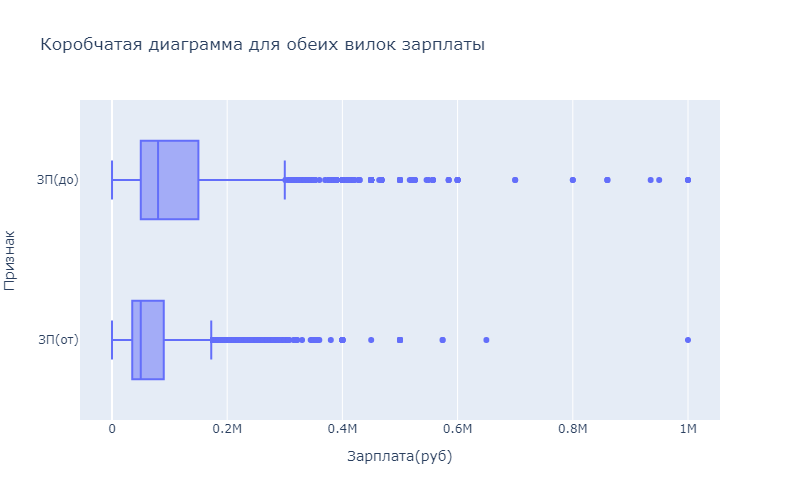

In [56]:
salary_to_box = px.box(
    full_vacancies,
    x=['ЗП(от)','ЗП(до)'],
    title='Коробчатая диаграмма для обеих вилок зарплаты',
    labels={'variable': 'Признак', 'value': 'Зарплата(руб)'},
    width=800,
    height=500
)
salary_to_box.show()

Из диаграммы видим, что в обеих вилках зарплаты есть аномальные значения, избавимся от них, применив метод Z-отклонений.

In [57]:
def outliers_z_score(data:pd.DataFrame, feature, left=3,
                    right=3, log_scale=False, log_adder=0):
    if log_scale:
        x = np.log(data[feature] + log_adder)
    else:
        x = data[feature]
    
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned 

# Сделаем более жесткую выборку "слева", чтобы не попали вакансии с очень низкой зп
# А также ослабим выборку "справа", т.к. из графика видно, что распределение ассиметрично в правую сторону
outliers_salary_from, cleaned_salary_from = outliers_z_score(full_vacancies, 'ЗП(от)', right=6, left=1.2)
outliers_salary, cleaned_salary = outliers_z_score(cleaned_salary_from, 'ЗП(до)', right=6, left=1.2)
print('Количество строк после очистки данных:', cleaned_salary.shape[0])

Количество строк после очистки данных: 10070


Построим графики по новым, очищенным, значениям.

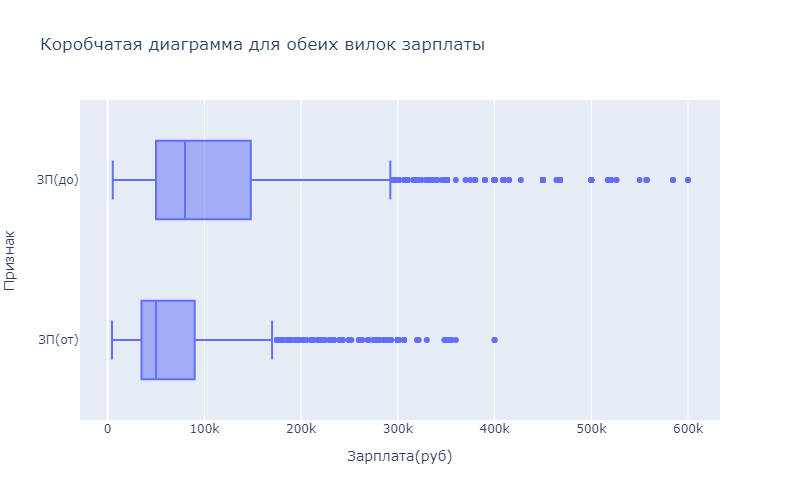

In [58]:
salary_to_box = px.box(
    cleaned_salary,
    x=['ЗП(от)','ЗП(до)'],
    title='Коробчатая диаграмма для обеих вилок зарплаты',
    labels={'variable': 'Признак', 'value': 'Зарплата(руб)'},
    width=800,
    height=500
)
salary_to_box.show()

Отлично, зарплаты в пределах разумного. Теперь можно добавить признак усредненной ЗП для каждой профессии.

In [59]:
grouped_by_position = cleaned_salary.groupby('Должность')[['ЗП(от)', 'ЗП(до)']].mean()
grouped_by_position['ЗП(средняя)'] = (grouped_by_position['ЗП(от)'] + grouped_by_position['ЗП(до)']) / 2
grouped_by_position.drop(['ЗП(от)', 'ЗП(до)'], inplace=True, axis=1)

Отсортируем полученную таблицу и выделим топ-20 самых высокооплачиваемых профессий.

In [60]:
print('Топ-20 самых высокооплачиваемых профессий')
display(grouped_by_position.sort_values(by='ЗП(средняя)', ascending=False).head(20))
print('Топ-20 самых низкооплачиваемых профессий')
display(grouped_by_position.sort_values(by='ЗП(средняя)').head(20))

Топ-20 самых высокооплачиваемых профессий


,ЗП(средняя)
Должность,
Руководитель Отдела тестирования/QA,500000.0
Lead of Mobile,460000.0
C++ developer to Berlin,452751.0
C++ developer (to Berlin),452751.0
Liquidity Bots Developer,438363.5
"Senior Java Engineer (JavaSE, algorithms, optimization)",438363.5
Senior DevOps Engineer,438363.5
Руководитель направления разработки,437500.0
Руководитель группы разработки,425000.0


Топ-20 самых низкооплачиваемых профессий


,ЗП(средняя)
Должность,
Оплачиваемая стажировка в ИТ(не для разработчиков),5301.0
Контролер технического состояния ТС (Зяневка),6000.0
Инженер-системный администратор Отдела системного программного обеспечения,7952.0
Manual QA Engineer / Инженер-Тестировщик (Стажер),8415.0
"IT специалист (СКО, г. Петропавловск)",9459.0
Специалист системы мониторинга,9764.0
Специалист технической поддержки на удаленку,9764.0
IT Стажёр Web-программист,10000.0
Начинающий IT-специалист (Help Desk),10374.0


Из полученных таблиц делаем выводы:
* Самые высокооплачиваемые профессии - руководящие или Senior-уровня
* Самые низкооплачиваемые сложно разделить по сферам деятельности, потому что в этот список попадают как IT-стажёры, так и копирайтеры, личные помощники, ассистенты, менеджеры.

Построим график количества вакансий по городам.

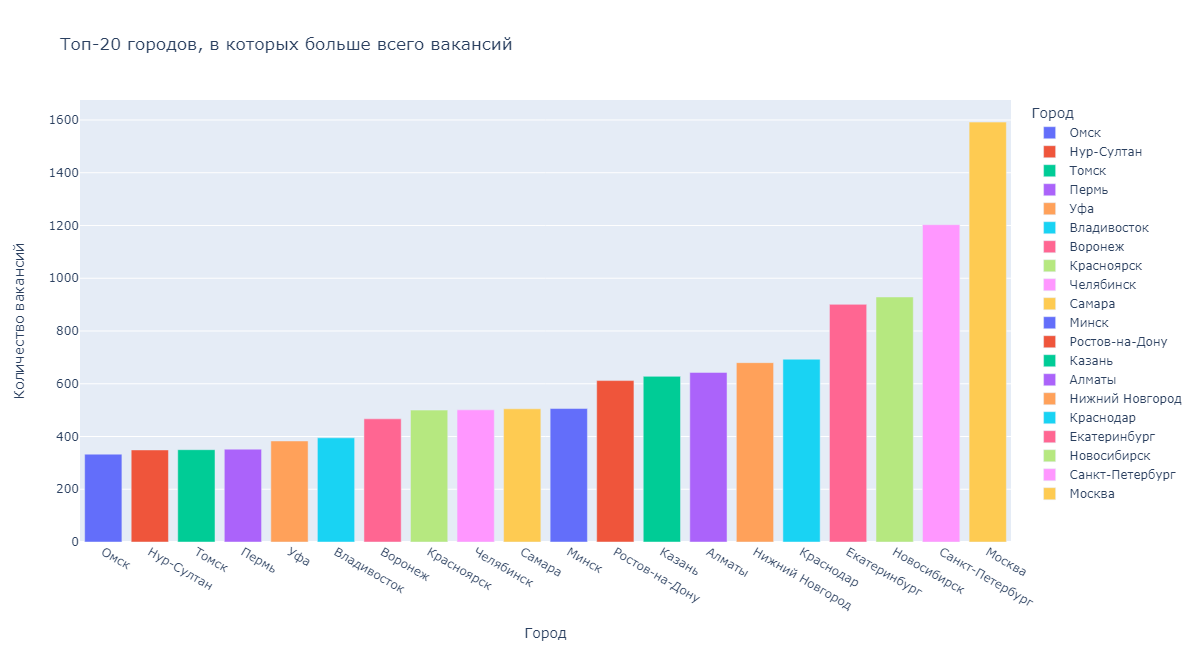

In [61]:
top_areas = full_vacancies['Регион'].value_counts().head(20).sort_values()
areas_bar = px.bar(
    top_areas,
    color=top_areas.index,
    title='Топ-20 городов, в которых больше всего вакансий',
    labels={'index': 'Город', 'value': 'Количество вакансий'},
    width=1200,
    height=650
)
areas_bar.show()

* Из графика получаем очевидный вывод, что большинство вакансий публикуются в крупных городах, которые возглавляет Москва.

Посмотрим, какие сферы деятельности наиболее популярны у топ-50 самых активных работодателей(по количеству вакансий).

In [62]:
employers_query = f'''
    WITH top_employers AS(
        SELECT
            e.id emp_id,
            e.name emp_name,
            COUNT(e.id) emp_count
        FROM
            public.vacancies v
            JOIN public.employers e ON e.id = v.employer_id
        GROUP BY e.id, e.name
        ORDER BY COUNT(e.id) DESC
        LIMIT 50
    )
    SELECT
        *
    FROM
        top_employers t
        JOIN public.employers_industries ei ON t.emp_id = ei.employer_id
        JOIN public.industries i ON i.id = ei.industry_id
'''

In [63]:
employers_df = pd.read_sql_query(employers_query, connection)
employers_df = employers_df.rename({'id': 'ind_id', 'name': 'industries'}, axis=1)
employers_df['industries'].value_counts().head(5)

Системная интеграция,  автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг                                                  19
Разработка программного обеспечения                                                                                                                 18
Интернет-компания (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы, продвижение сайтов и прочее)     5
Банк                                                                                                                                                 5
Мобильная связь                                                                                                                                      4
Name: industries, dtype: int64

Из полученного объекта Series мы можем наблюдать, что сильно выделяются 2 категории сфер деятельности, которые чаще всего указываются в вакансиях 50-ти самых активных работодателей:
* Системная интеграция,  автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг
* Разработка программного обеспечения


***

## Анализ DS-вакансий из БД

Напишем запрос к БД, чтобы получить все вакансии для DS.

In [64]:
full_ds_query = f'''
    {full_query}
    WHERE {ds_filter}
'''

Посмотрим на датафрейм для всех Data Science вакансий.

In [65]:
full_ds_vacancies = pd.read_sql_query(full_ds_query, connection)
full_ds_vacancies.head()

,id,Должность,Ключевые навыки,График,Опыт,Занятость,ЗП(от),ЗП(до),Регион,Работодатель
0,50533416,Junior+ CV/ML developer,Python\tSQL\tРабота в команде\tOpenCV\tML,Гибкий график,От 1 года до 3 лет,Полная занятость,NaN,NaN,Новосибирск,Технологика
1,54824572,Data Scientist,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,Алматы,Мобайл Телеком-Сервис (Объединенная Компания T...
2,54825318,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,Полный день,От 1 года до 3 лет,Полная занятость,50000.0,70000.0,Пермь,Випакс+
3,66120847,AI/ML Senior Engineer,Python\tFlask\tLinux\tAWS\tGit,Гибкий график,От 3 до 6 лет,Полная занятость,NaN,NaN,Ташкент,Itransition
4,55351147,Data Scientist,Python\tSQL\tNLP\tScikit-learn\tMachine Learning,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,Краснодар,МегаФон


Уберём табуляцию в ключевых навыках.

In [66]:
full_ds_vacancies['Ключевые навыки'] = full_ds_vacancies['Ключевые навыки'].apply(lambda skills: str(skills).replace('\t', ', '))
full_ds_vacancies['Ключевые навыки'].head()

0            Python, SQL, Работа в команде, OpenCV, ML
1    Oracle Pl/SQL, Базы данных, Machine Learning, ...
2    Python, OpenCV, Tensorflow, Computer Vision, Н...
3                       Python, Flask, Linux, AWS, Git
4     Python, SQL, NLP, Scikit-learn, Machine Learning
Name: Ключевые навыки, dtype: object

Посмотрим, какие ключевые навыки более востребованы.

In [67]:
key_skills = {}

def count_skills(skills:str):
    for skill in skills.split(', '):
        # On previous step we could take None's as string
        if skill != 'None':
            if skill not in key_skills.keys():
                key_skills[skill] = 1
            else :
                key_skills[skill] += 1

# Fill key_skills dict by (skill: count) scheme
full_ds_vacancies['Ключевые навыки'].apply(count_skills)
# Series is easier to process data instead of dict
key_skills_series = pd.Series(key_skills)
print('Количество различных ключевых навыков:', key_skills_series.shape[0])

Количество различных ключевых навыков: 431


Слишком много различных ключевых навыков, выделим топ-10 самых популярных и построим график по этому топ-10.

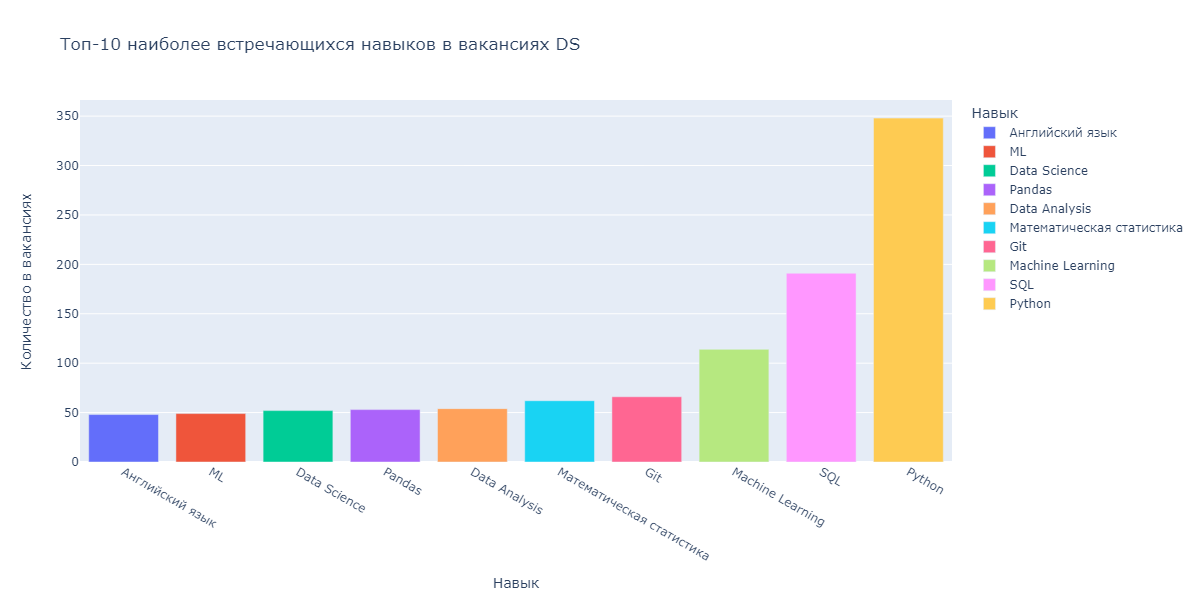

In [68]:
key_skills_top = key_skills_series.sort_values(ascending=False).head(10).sort_values()
key_skills_bar = px.bar(
    key_skills_top,
    color=key_skills_top.index,
    labels={'index': 'Навык', 'value': 'Количество в вакансиях'},
    title='Топ-10 наиболее встречающихся навыков в вакансиях DS',
    width=1200,
    height=600
)
key_skills_bar.show()

Из графика можем сделать следующий вывод:
* Кроме владения Python, SQL и Machine Learning необходимо ещё отлично знать математическую статистику, Git, pandas, английский язык.

Посмотрим на распределение по опыту среди вакансий DS.

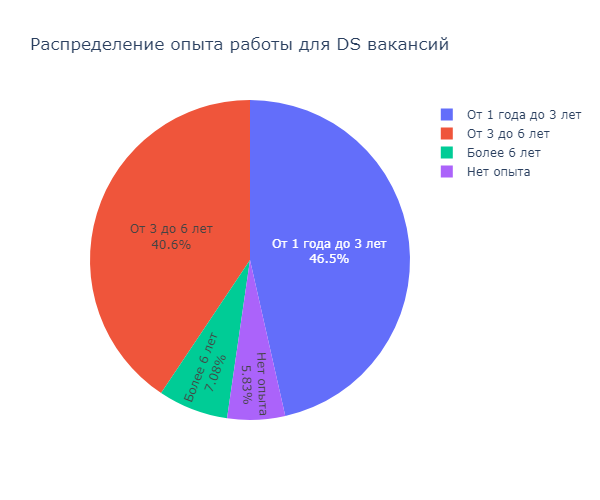

In [69]:
exp_rate_bar = px.pie(
    full_ds_vacancies.sort_values(by='Опыт'),
    names='Опыт',
    width=600,
    height=500,
    title='Распределение опыта работы для DS вакансий'
)
exp_rate_bar.update_traces(textposition='inside', textinfo='percent+label')

У большинства соискателей опыт работы составляет от 1 года до 6 лет, если объединить 2 группы, у которых примерно одинаковое соотношение. Можно наблюдать, что специалистов, которые выходят за рамки (меньше 1 года или более 6 лет) в разы меньше.

Сгруппируем медианную(менее подвержена разбросу значений) ЗП по опыту работы.

In [70]:
# Delete rows with more than 2 empty columns
without_na = full_ds_vacancies.dropna(axis=0, thresh=full_ds_vacancies.columns.shape[0]-2)
grouped_exp_salary = without_na.groupby('Опыт')[['ЗП(от)', 'ЗП(до)']].median().sort_values(by='Опыт')
display(grouped_exp_salary)

,ЗП(от),ЗП(до)
Опыт,,
Более 6 лет,NaN,NaN
Нет опыта,60000.0,100000.0
От 1 года до 3 лет,100000.0,171000.0
От 3 до 6 лет,200000.0,292242.0


Из сгруппированной таблицы можем наблюдать, что для вакансий, в которых требуемый опыт более 6 лет, не указываются зп. Вероятно, дело в том, что суммы уже договорные и сильно зависят от навыков соискателя.

Построим график, иллюстрирующий темп роста средней ЗП (между нижней и верхней вилками) с ростом опыта соискателя

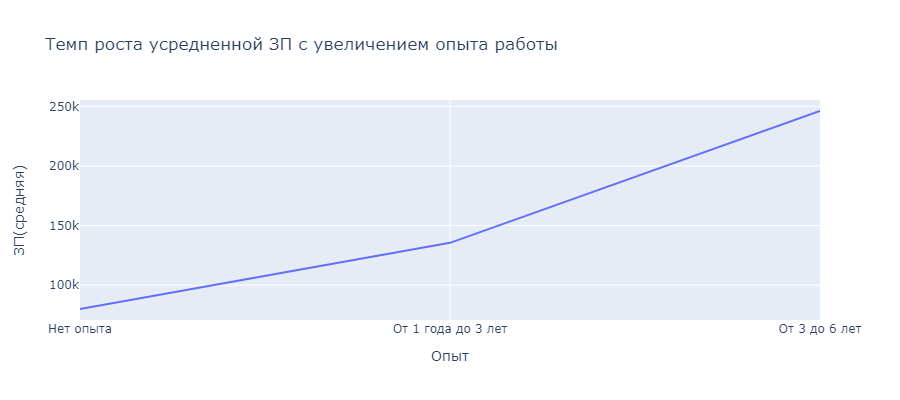

In [71]:
mean_salary_by_exp = grouped_exp_salary.dropna()
mean_salary_by_exp['ЗП(средняя)'] = (mean_salary_by_exp['ЗП(от)'] + mean_salary_by_exp['ЗП(до)']) / 2
salary_growth_rate = px.line(
    mean_salary_by_exp,
    y='ЗП(средняя)',
    title='Темп роста усредненной ЗП с увеличением опыта работы',
    width=900,
    height=400
)
salary_growth_rate.show()

Из графика можем наблюдать, что наибольший темп роста зарплаты начинается примерно с уровня middle и выше, когда у соискателя уже есть минимум 1 год опыта работы.

## Итоги

**Итоги по исследованию всех вакансий:**
* Наибольшее количество вакансий сосредоточено в городах-миллионниках, которые возглавляет Москва
* Самые высокооплачиваемые профессии - руководители и senior-разработчики в сфере IT
* Работодатель с наибольшим количеством вакансий - Яндекс.
* Вакансий в 2 раза больше, чем количество работодателей. Это означает, что многие работодатели публикуют 2 или более вакансии.
* У половины вакансий не указано ни одно из полей зарплаты. Отсюда вывод, что некоторые работодатели более склонны скрывать рамки зарплаты и разглашать эту информацию непосредственно после собеседования с соискателем, опираясь на его опыт и знания. 

**Итоги по исследованию вакансий по Data Science:**
* DS-вакансий от работодателей достаточно, чтобы каждый специалист с достаточным уровнем знаний нашёл для себя работу.
* DS - набирающая популярность профессия, т.к. хоть вакансий пока в процентном соотношении не так много, как хотелось бы, но зарплаты говорят о том, что компании готовы немало платить хорошим специалистам по данной профессии.
* Полагаю, в ближайшие 2-3 года количество вакансий сильно возрастет, т.к. всё больше и больше компаний увидят в том, что машинное обучение и нейросети могут приумножить прибыль.
* Темп роста зарплаты значительно повышается, когда человек достигает уровня Middle.
* Напротив высокой ЗП стоят и высокие требования к hard-skills соискателя, необходимо хорошо углубить свои знания в таких аспектах, как:
    1. Python
    2. SQL
    3. Machine Learning
    4. Math statistics
    5. Git
    6. Английский язык
    7. Pandas
